# Number of electrons released from Photocathode by He ions

In [71]:
import numpy as np
import ROOT
import matplotlib.pyplot as plt
from matplotlib import cycler, patches
import xml.dom.minidom as minidom
from matplotlib.colors import LogNorm

In [79]:
IPython_default = plt.rcParams.copy()
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

figsize = (4.5, 3)

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "serif"

marker_size = 3
line_width = 0.5

colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB', '#653700', '#F97306'])
plt.rc('axes', facecolor='white', edgecolor='black',
       axisbelow=True, grid=True, prop_cycle=colors)


In [83]:
file = ROOT.TFile("/Users/williamquinn/Desktop/data/set_5/211209_A1400_B1400_t1101.root", "READ")
tree = file.T
tree.Print()

******************************************************************************
*Tree    :T         : Tree containing waveform information                   *
*Entries :   124391 : Total =       275325259 bytes  File  Size =  226700955 *
*        :          : Tree compression factor =   1.21                       *
******************************************************************************
*Br    0 :pulse_charge : pulse_charge/D                                      *
*Entries :   124391 : Total  Size=     996621 bytes  File Size  =     805561 *
*Baskets :       12 : Basket Size=     132096 bytes  Compression=   1.24     *
*............................................................................*
*Br    1 :pulse_charge_parameters : vector<double>                           *
*Entries :   124391 : Total  Size=    6721750 bytes  File Size  =    2247716 *
*Baskets :       37 : Basket Size=    1020928 bytes  Compression=   2.99     *
*...................................................

Text(0.5, 0, 'Timestamp /ns')

TFile**		/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root	
 TFile*		/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root	
  KEY: TH1D	Template_Ch0;1	Template_Ch0
  KEY: TH1D	Template_Ch1;1	Template_Ch1


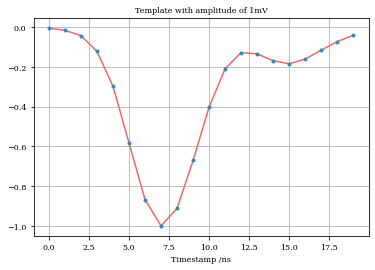

In [84]:
template_file = ROOT.TFile("/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root")
template_file.ls()

h_template = template_file.Get("Template_Ch0")
x = []
y = []

for i in range(1, h_template.GetNbinsX()+1):
    x.append(i-1)
    y.append(h_template.GetBinContent(i))
    #print(i, h_template.GetBinContent(i))
y = np.array(y)
x = np.array(x)

plt.plot(x, y/(-1*np.amin(y)))
plt.plot(x, y/(-1*np.amin(y)), ".")
plt.title("Template with amplitude of 1mV")

plt.xlabel("Timestamp /ns")
#y = y/(-1*np.amin(y))

The matched filtering output Amplitude Index represents a real amplitude for the pulse. We have to scale this by using the template.

In [6]:
normalised_y = y/np.dot(y,y)
unit_y = y/(-1*np.amin(y))

amp_scale = np.dot(normalised_y, unit_y)/np.sqrt(np.dot(normalised_y,normalised_y))

print("Amplitude scale =", amp_scale)

Amplitude scale = 1.9571128798282273


In [100]:
n_ap_charges = [[[], [], [], []], [[], [], [], []]]
n_shapes = [[], []]
n_amps = [[], []]
n_times = [[], []]
n_ap_pes = [[[], [], [], []], [[], [], [], []]]
n_ap_he_charges = [[[], [], [], []], [[], [], [], []]]
n_ap_he_pes = [[[], [], [], []], [[], [], [], []]]
n_ap_region_charge = [[], []]
n_ap_he_region_charge = [[], []]
n_tot_ap_charges = [[], []]
n_tot_ap_he_charges = [[], []]
n_ap_nums = [[], []]
n_ap_he_nums = [[], []]
n_charges = [[], []]
for event in tree:
    om = event.OM_ID
    if om == 1:
        continue
    amps = list(event.apulse_amplitudes)
    shapes = list(event.apulse_shapes)
    n_charges[om].append(event.pulse_charge)
    ts = list(event.apulse_times)
    n_ap_region_charge[om].append(event.ap_region_charge)
    n_ap_nums[om].append(len(amps))
    
    temp = 0
    for i_ap, ap in enumerate(amps):
        shp = shapes[i_ap]
        charge = -1*np.sum(unit_y)*ap/amp_scale /50
        pe = charge*1e-12 /1700000 /1.602e-19 
        
        if shp > 0.80:
            n_ap_charges[om][0].append(charge)
            n_ap_pes[om][0].append(pe)
        if shp > 0.85:
            n_ap_charges[om][1].append(charge)
            n_ap_pes[om][1].append(pe)
        if shp > 0.9:
            n_ap_charges[om][2].append(charge)
            n_ap_pes[om][2].append(pe)
        if shp > 0.95:
            n_ap_charges[om][3].append(charge)
            n_ap_pes[om][3].append(pe)  
        temp += charge
        n_shapes[om].append(shp)
        n_amps[om].append(ap)
        n_times[om].append(ts[i_ap])
    n_tot_ap_charges[om].append(temp)
    
    n_ap_he_region_charge[om].append(event.he_ap_region_charge)
    num = 0
    for i_ap in range(len(ts)):
        if 1400 < ts[i_ap] < 2000:
            num += 1
    n_ap_he_nums[om].append(num)
    
    temp0 = 0
    for i_ap, ap in enumerate(amps):
        t = ts[i_ap]
        if 1400 <= t <= 2000:
            shp = shapes[i_ap]
            charge = -1*np.sum(unit_y)*ap/amp_scale /50
            pe = charge*1e-12 /1700000 /1.602e-19 

            if shp > 0.80:
                n_ap_he_charges[om][0].append(charge)
                n_ap_he_pes[om][0].append(pe)
            if shp > 0.85:
                n_ap_he_charges[om][1].append(charge)
                n_ap_he_pes[om][1].append(pe)
            if shp > 0.9:
                n_ap_he_charges[om][2].append(charge)
                n_ap_he_pes[om][2].append(pe)
            if shp > 0.95:
                n_ap_he_charges[om][3].append(charge)
                n_ap_he_pes[om][3].append(pe)  
            temp0 += charge
        else:
            pass
    n_tot_ap_he_charges[om].append(temp0)

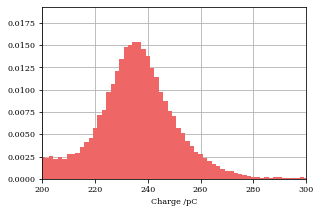

In [102]:
plt.figure(figsize=figsize, facecolor='white')
freq, bin_edges = np.histogram(n_charges[0], range=(0,400), bins=240)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq), width=bin_width)
plt.xlim(200, 300)
plt.xlabel('Charge /pC')
plt.tight_layout()

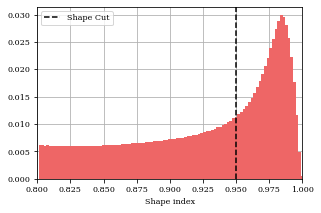

In [94]:
plt.figure(figsize=figsize, facecolor='white')
freq, bin_edges = np.histogram(n_shapes[0], range=(0.8,1), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq), width=bin_width)
plt.xlim(0.8, 1)
plt.axvline(0.95, ls='--', color='k', label="Shape Cut")
plt.xlabel('Shape index')
plt.legend(loc='best')
plt.tight_layout()

No handles with labels found to put in legend.


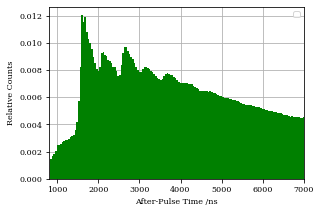

In [91]:
plt.figure(figsize=figsize, facecolor='white')
freq, bin_edges = np.histogram(n_times[0], range=(800,7000), bins=155)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq), width=bin_width, color='g')
plt.xlim(800, 7000)
#plt.axvline(0.95, ls='--', color='k', label="Shape Cut")
plt.xlabel('After-Pulse Time /ns')
plt.ylabel('Relative Counts')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig("/Users/williamquinn/Desktop/PMT_Project/time.pdf")

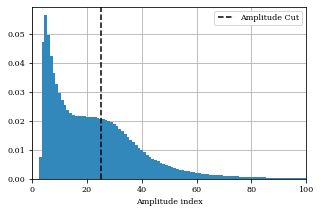

In [92]:
plt.figure(figsize=figsize, facecolor='white')
freq, bin_edges = np.histogram(n_amps[0], range=(0, 100), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq), width=bin_width, color='C1')
plt.xlim(0, 100)
plt.axvline(25, ls='--', color='k', label="Amplitude Cut")
plt.xlabel('Amplitude index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig("/Users/williamquinn/Desktop/PMT_Project/amp.pdf")

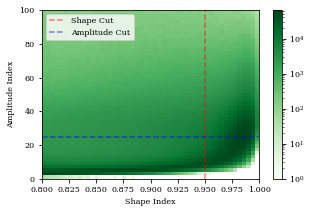

In [93]:
plt.figure(figsize=figsize, facecolor='white')
x_bins = np.linspace(0.8, 1, 50)
y_bins = np.linspace(0, 100, 50)
plt.hist2d(n_shapes[0], n_amps[0], bins =[x_bins, y_bins], cmap=plt.get_cmap('Greens'), norm=LogNorm())
plt.axvline(0.95, ls='--', color='r', label='Shape Cut', alpha=0.5)
plt.axhline(25, ls='--', color='b', label='Amplitude Cut', alpha=0.5)
plt.colorbar()
plt.legend(loc='best')
plt.xlabel('Shape Index')
plt.ylabel('Amplitude Index')
plt.tight_layout()
# plt.savefig("/Users/williamquinn/Desktop/PMT_Project/shape_vs_amp_index.pdf")

(0.0, 100.0)

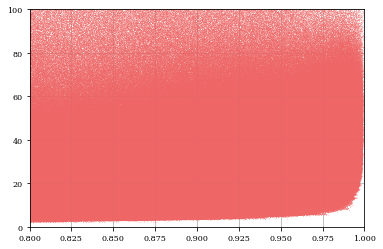

In [95]:
plt.plot(n_shapes[0], n_amps[0], ',', alpha=0.2)
plt.xlim(0.8,1)
plt.ylim(0,100)

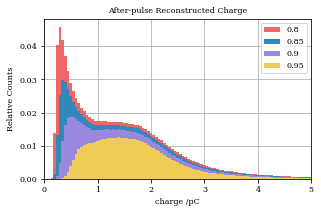

In [96]:
plt.figure(figsize=figsize, facecolor='white')
freq_0, bin_edges = np.histogram(n_ap_charges[0][0], range=(0,5), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq_0/np.sum(freq_0), width=bin_width, label='0.8')

freq, bin_edges = np.histogram(n_ap_charges[0][1], range=(0,5), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq_0), width=bin_width, label='0.85')

freq, bin_edges = np.histogram(n_ap_charges[0][2], range=(0,5), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq_0), width=bin_width, label='0.9')

freq, bin_edges = np.histogram(n_ap_charges[0][3], range=(0,5), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq_0), width=bin_width, label='0.95')

#plt.yscale('log')
plt.ylabel("Relative Counts")
plt.xlabel("charge /pC")
plt.legend(loc='best')
plt.xlim(0,5)
plt.title("After-pulse Reconstructed Charge")
# plt.yscale('log')
plt.tight_layout()
# plt.savefig("/Users/williamquinn/Desktop/PMT_Project/ap_charge_recon.pdf")

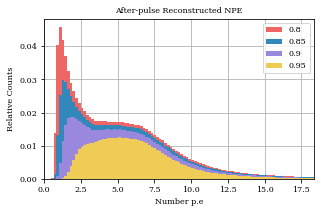

In [97]:
plt.figure(figsize=figsize, facecolor='white')
upper = 5*1e-12 /1700000 /1.602e-19 
freq_0, bin_edges = np.histogram(n_ap_pes[0][0], range=(0,upper), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq_0/np.sum(freq_0), width=bin_width, label='0.8')

freq, bin_edges = np.histogram(n_ap_pes[0][1], range=(0,upper), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq_0), width=bin_width, label='0.85')

freq, bin_edges = np.histogram(n_ap_pes[0][2], range=(0,upper), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq_0), width=bin_width, label='0.9')

freq, bin_edges = np.histogram(n_ap_pes[0][3], range=(0,upper), bins=100)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq/np.sum(freq_0), width=bin_width, label='0.95')

#plt.yscale('log')
plt.ylabel("Relative Counts")
plt.xlabel("Number p.e")
plt.xlim(0,upper)
plt.title("After-pulse Reconstructed NPE")
# plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig("/Users/williamquinn/Desktop/PMT_Project/npe.pdf")

In [10]:
def get_pulse_from_root_file( filename ):
    pulses = [[], []]
    pulse_root_file = ROOT.TFile(filename, "READ")
    for itemp in range(2):
        temp_vector = []
        hist_name = "1400V_pulse_30ns_Ch{}".format(itemp)

        template_hist = pulse_root_file.Get(hist_name)

        for ihist in range(1, int(template_hist.GetEntries()) + 1):
            temp_vector.append(template_hist.GetBinContent(ihist));
        del template_hist

        pulses[itemp] = (temp_vector)
            
    pulse_root_file.Close()
    
    pulses = [-1*np.array(pulses[0])/np.amin(pulses[0]), -1*np.array(pulses[1])/np.amin(pulses[1])]

    return pulses

def get_baseline( vec ):
    pre_trigger = 500
    baseline = 0
    for i_vec in range(pre_trigger):
        baseline += vec[i_vec]
    return baseline/pre_trigger

def get_amplitude( vec, baseline ):
    amplitude = vec[0]
    for i_vec in range(len(vec)):
        if vec[i_vec] < amplitude:
            amplitude = vec[i_vec]
    return (-1)*(amplitude - baseline)

def get_charge( vec, baseline, peak_cell ):
    charge = 0.0
    for i_ch in range(peak_cell - 10, peak_cell + 20):
        charge += vec[i_ch] - baseline
    return (-1.0)*charge/50

def get_peak_cell( vec ):
    peak_cell = 0
    temp = vec[0]
    for i_vec in range(len(vec)):
        if vec[i_vec] < temp:
            temp = vec[i_vec]
            peak_cell = i_vec
    
    return peak_cell

def check_saturation(waveform, peak_cell):

    for i in range(550, 750):
        if waveform[i] == 0.0:
            return True
    return False

def get_sat_charge(vec, baseline, av_pulse, channel, peak_cell ):
    pos = []
    done_pos = False
    for i_vec in range(550, 750):
        if vec[i_vec] == 0.0:
            done_pos = True
            pos.append(i_vec)
        else:
            if (done_pos):
                break

    middle = int(len(pos) / 2)
    the_pos = pos[middle]

    pulse_r = []
    pulse = []
    new_pulse = []
    xi = []
    for i_pos in range(the_pos - 10, the_pos + 20):
        pulse_r.append(vec[i_pos] - baseline)
        pulse.append(vec[i_pos])

    graph = ROOT.TGraphErrors()
    n_point = 0
    for j in range(len(pulse)):
        if j > 14:
            break
        
        if pulse[j] == 0:
            continue
        else:
            new_pulse.append(pulse_r[j])
            xi.append(j)
            graph.SetPoint(n_point, j, pulse_r[j])
            graph.SetPointError(n_point, 0, np.sqrt(abs(pulse_r[j])))
            n_point+=1

    temp_std = 0
    if channel == 0:
        temp_std = 2.22
    else:
        temp_std = 2.14
    

    fit = ROOT.TF1("fit", "[0]*TMath::Gaus(x, [1],{})".format(temp_std), 0, 14)
    fit.SetParLimits(0, -3500, -900)
    fit.SetParLimits(1, 5, 15)
    fit.SetParameters(-1001, 10)

    graph.Fit("fit", "0Q", "", 0, 14)
    A = fit.GetParameter(0)
    mu = fit.GetParameter(1)

    if A < -3500 or A > -900:
        print("The code is breaking the laws of physics")

    charge = 0.0
    for k in range(len(av_pulse)):
        charge += av_pulse[k]
    charge = charge * A / 50

    pulse_pars = []
    pulse_pars.append(charge);
    pulse_pars.append(fit.GetParameter(0))
    pulse_pars.append(fit.GetParError(0))
    pulse_pars.append(fit.GetParameter(1))
    pulse_pars.append(fit.GetParError(1))

    del graph
    del fit

    return pulse_pars

Let us look at the individual after-pulses

In [11]:
filename = "/Users/williamquinn/Desktop/PMT_Project/200117_A1400_B1400_t1003.xml"
file = minidom.parse(filename)
traces = file.getElementsByTagName('trace')

In [ ]:
waveforms = [[], []]
ap_region_charge = [[], []]

for i in range(int(traces.length)):
    trace = traces[i].firstChild.data.split(" ")[1:-1]
    channel = int(traces[i].attributes['channel'].value)
    
    if i % 10000 == 0:
        print(i)
    
    waveform = np.array(trace, dtype='float')

    baseline = get_baseline(waveform)
    peak = get_peak_cell(waveform)
    #print("peak: ",peak)
        
    if peak < 550:
        continue
    elif peak > 750:
        continue
        
    amplitude = get_amplitude(waveform, baseline)
    #print("amplitude: ",amplitude)
        
    if amplitude < 50:
        continue
            
    is_sat = check_saturation(waveform, peak)
        
    if is_sat:
        temp_pars = get_sat_charge(waveform, baseline, temp_pulse[channel], channel, peak)
        if len(temp_pars) == 0: 
            charge = 0
        else:
            charge = temp_pars[0]
    else:
        charge = get_charge(waveform, baseline, peak)
        
    #print("charge: ", charge)

    if charge < 6:
        continue
            
    waveforms.append(waveform[1:] - baseline)
    ap_region_charge.append(np.sum(waveform[800:] - baseline)/50)
    

10000 events step = 80.41644883155823 s
20000 events step = 80.64197707176208 s
30000 events step = 79.75411319732666 s


Text(0.5, 0, 'Charge /pC')

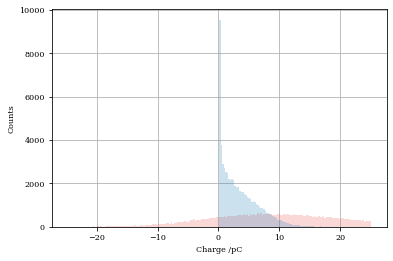

In [33]:
freq, bin_edges = np.histogram(n_ap_region_charge[0], range=(-25,25), bins=200)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq, width=bin_width, alpha=0.25)

freq, bin_edges = np.histogram(n_tot_ap_charges[0], range=(-25,25), bins=200)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq, width=bin_width, alpha=0.25)

#plt.yscale('log')
plt.ylabel("Counts")
plt.xlabel("Charge /pC")
#plt.xlim(0, 5)

66803 66803


Text(0.5, 0, 'Charge /pC')

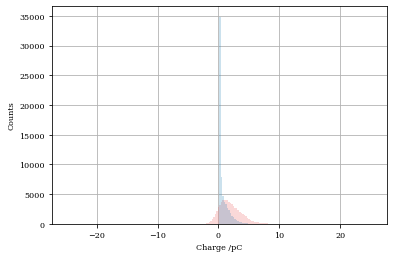

In [35]:
print(len(n_ap_he_region_charge[0]), len(n_tot_ap_he_charges[0]))
freq, bin_edges = np.histogram(n_ap_he_region_charge[0], range=(-25,25), bins=200)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq, width=bin_width, alpha=0.25)

freq, bin_edges = np.histogram(n_tot_ap_he_charges[0], range=(-25,25), bins=200)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[:-1] + bin_width
plt.bar(bin_centres, freq, width=bin_width, alpha=0.25)

#plt.yscale('log')
plt.ylabel("Counts")
plt.xlabel("Charge /pC")
#plt.xlim(0, 5)